# B3. Examining and comparing estimators



In [36]:
from scipy.stats import binom
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.pointestimation import (get_sample, get_samples,
                                  get_description, get_table1)

a_dist = binom(n=10, p=0.5)  # the discrete uniform distribution

Let $X$ be a random sample of size $n=10$ from the binomial distribution $B(10,0.5)$.

For example,

In [37]:
a_sample = get_sample(a_dist, n=10)
a_sample

,X,obs
0,1,4
1,2,4
2,3,6
3,4,3
4,5,3
5,6,6
6,7,6
7,8,4
8,9,4
9,10,7


The binomial distribution has mean

$$
\mu = np = 10(0.5) = 5,
$$

and variance

$$
\sigma^{2} = np(1-p) = 10(0.5)(0.5) = 2.5.
$$

Now, $X$ will have three measures associated with it:

- Sample mean, $E(X)$,
- Sample variance, $SV(X)$,
- Population variance, $PV(X)$

Let us summarise these five attributes of $X$ in a table:

In [38]:
get_description(a_dist, a_sample["obs"])

,Mean,Variance,E(X),SV(X),PV(X)
0,5.0,2.5,4.7,2.011111,1.81


Continuing on, let $SV(X) = SV$ and $PV(X) = PV$.
It's important to note that $SV$ and $PV$ are themselves random variables, as their values originate from a collection of random variables (from $X$).

Let us generate 1000 observations of $SV$ and $PV$ from $N=1000$ random samples of size $n=10$ from $B(n,p)$

~~~
BEGIN
Loop for 1000 times
  Generate a random sample of size 10 from B(10,0.5)
  Calculate the sample mean E(X)
  Calculate the sample variance SV
  Calculate the population variance PV
END
~~~

In [39]:
samples = pd.DataFrame(get_samples(a_dist, n=10, N=1000))
samples.head()

,E(X),SV,PV
0,5.6,4.711111,4.24
1,4.7,2.011111,1.81
2,5.4,3.822222,3.44
3,4.4,5.155556,4.64
4,4.4,1.600000,1.44


In [40]:
samples["SV"].mean()

2.512322222222222

In [41]:
samples["PV"].mean()

2.2610900000000003

The acivity simulates *"taking a large number ($N$) of samples, each of size $n$, from a Poisson distribution with parameter $\lambda$."*
It also plots the p.m.f.

### (a)

> Generate a $N=1000$ samples, each of size $n=10$, from a Poisson distribution with paramters $\lambda=1$.
> Plot a unit-area histogram of the sample means and the sample variances, and describe the distributions.

We first generate the samples, and calculate each sample's mean and variance.

In [42]:
samples: dict = get_samples(a_dist=poisson(mu=1),
                            n=10,
                            N=1000)

NameError: name 'poisson' is not defined

Now we plot unit-area histograms of the samples' means and variances.

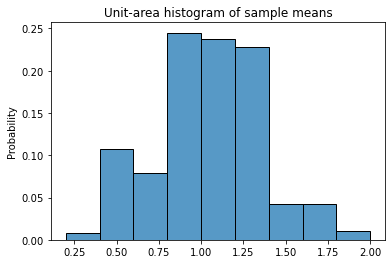

In [3]:
ax = sns.histplot(x=samples["means"],
                  stat="probability",
                  binwidth=0.2)
plt.title("Unit-area histogram of sample means")
plt.show()

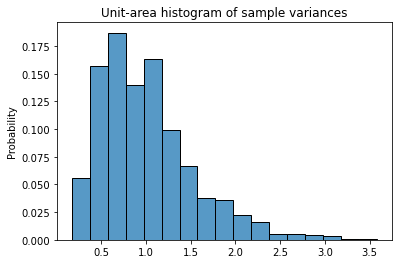

In [4]:
ax = sns.histplot(x=samples["sample vars"],
                  stat="probability",
                  binwidth=0.2)
plt.title("Unit-area histogram of sample variances")
plt.show()

It is evident that the histogram for the sample means is approximately symmetric, whilst the histogram for the sample variances however is right-skew.

### (b)

*Add question*.

Note, the table also shows the **population variance.**

In [4]:
get_table1(a_dist=randint(low=0, high=11),
           n=10,
           N=1000)

,Sample,Mean,Sample Variance,Population Variance
0,One,4.9750,9.861244,8.87512
1,Two,5.0390,10.041511,9.03736
2,Three,4.9998,10.121667,9.10950
3,Four,5.0294,10.052533,9.04728
4,Five,4.9835,9.947522,8.95277


The population variance was include to show that it is a **biased estimator**.

### (c)